In [1]:
from loadmodules import *
import pandas as pd

target_gas_mass = 3.74806e-06
hubbleparam = 0.67769999999999997
snap = 127
nhalos = 30

import shutil
import satellite_utilities as sat
# util_file = '/cds/kravtsov/Simulations/Auriga/satellite_utilities.py/'

In [2]:
import shutil
src = '/cds/kravtsov/Simulations/Auriga/satellite_utilities.py'
dst =  '/home/lgvanover/intro_scripts/satellite_utilities.py'
shutil.copyfile(src, dst)
import satellite_utilities as sat

/home/lgvanover/.local/lib/python3.7/site-packages/gadget_snap.py:653: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('uint64'):
/home/lgvanover/.local/lib/python3.7/site-packages/gadget_subfind.py:435: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('int64'):


galrad= 0.021382471919059755
Centering Subhaloes...
sub pos before= [[56.47758484 49.3947525  49.62681961]
 [56.31905746 49.47288513 49.55585098]
 [56.18457413 49.3343811  49.50635529]
 ...
 [57.37153244 49.36505127 47.91469193]
 [57.33240509 49.18948746 48.48175812]
 [57.14354324 49.66378784 47.26251221]]
sub pos after= [[ 0.          0.          0.        ]
 [-0.15852737  0.07813263 -0.07096863]
 [-0.29301071 -0.0603714  -0.12046432]
 ...
 [ 0.8939476  -0.02970123 -1.71212769]
 [ 0.85482025 -0.20526505 -1.14506149]
 [ 0.6659584   0.26903534 -2.3643074 ]]
!!! agesel
Found 45709 stars.
Rotated pos.
Rotated vel.
Rotating subhaloes...
sub values= [[56.463802 49.39944  49.621296]
 [59.013756 48.45344  50.138214]
 [57.562603 47.52215  49.961933]
 ...
 [56.914577 49.420383 48.97932 ]
 [56.874817 49.40001  49.023346]
 [57.143417 49.66386  47.263153]]
sub values after= [[50.842426 65.38001  35.08903 ]
 [50.54352  67.97873  34.18253 ]
 [50.365395 66.51851  33.265873]
 ...
 [50.165512 65.6939  

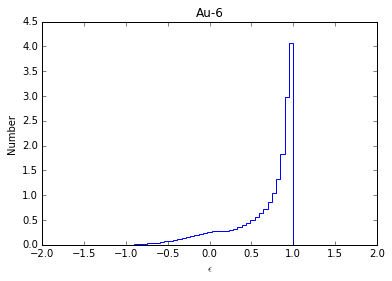

In [3]:


target_gas_mass = 3.74806e-06
hubbleparam = 0.67769999999999997
select_halo = 6
snap = 127
nhalos = 30
select_halo =6

path = '/cds/kravtsov/Simulations/Auriga/level4_MHD/halo_'+str(select_halo)+'/output/'
treebase = '/cds/kravtsov/Simulations/Auriga/level4_MHD/mergertrees/Au-'+str(select_halo)+'/trees_sf1_127'

    
#Load data
s = gadget_readsnap(snap,snappath=path,hdf5=True,loadonlytype=[4])
sf = load_subfind(snap,dir=path,hdf5=True)

s.calc_sf_indizes( sf )
s.select_halo( sf, 3., use_principal_axis=True, use_cold_gas_spin=False, do_rotation=True )


attrs = ['pos', 'vel', 'mass', 'age', 'id', 'pot']
g = parse_particledata( s, sf, attrs, radialcut = 0.1*sf.data['frc2'][0] ,docircularities=True)
g.prep_data()

sdata = g.sgdata['sdata']
eps2 = sdata['eps2']
smass = sdata['mass']
star_age = sdata['age']

figure()
hist(eps2,bins=50,histtype='step',density=True,weights=smass)
xlabel(r'$\epsilon$')
ylabel('Number')
title('Au-6')
xlim(-2,2)
print('mean,median epsilon',mean(eps2),median(eps2))

In [8]:
pd.read_hdf("halos/level4/halo_24.hdf5", "table")

,Redshift,Med_Eps,Disk_Ratio
0,10.919033,1.000000,1.000000
1,10.367444,NaN,NaN
2,9.841380,0.080277,0.433606
3,9.388771,NaN,NaN
4,8.907999,0.220579,0.434982
...,...,...,...
92,0.058507,0.651301,0.679272
93,0.048524,0.650988,0.679801
94,0.033724,0.652922,0.679324
95,0.023974,0.658403,0.682938


Text(0.5, 0.98, 'Median Eps and Disk Ratio over Redshift')

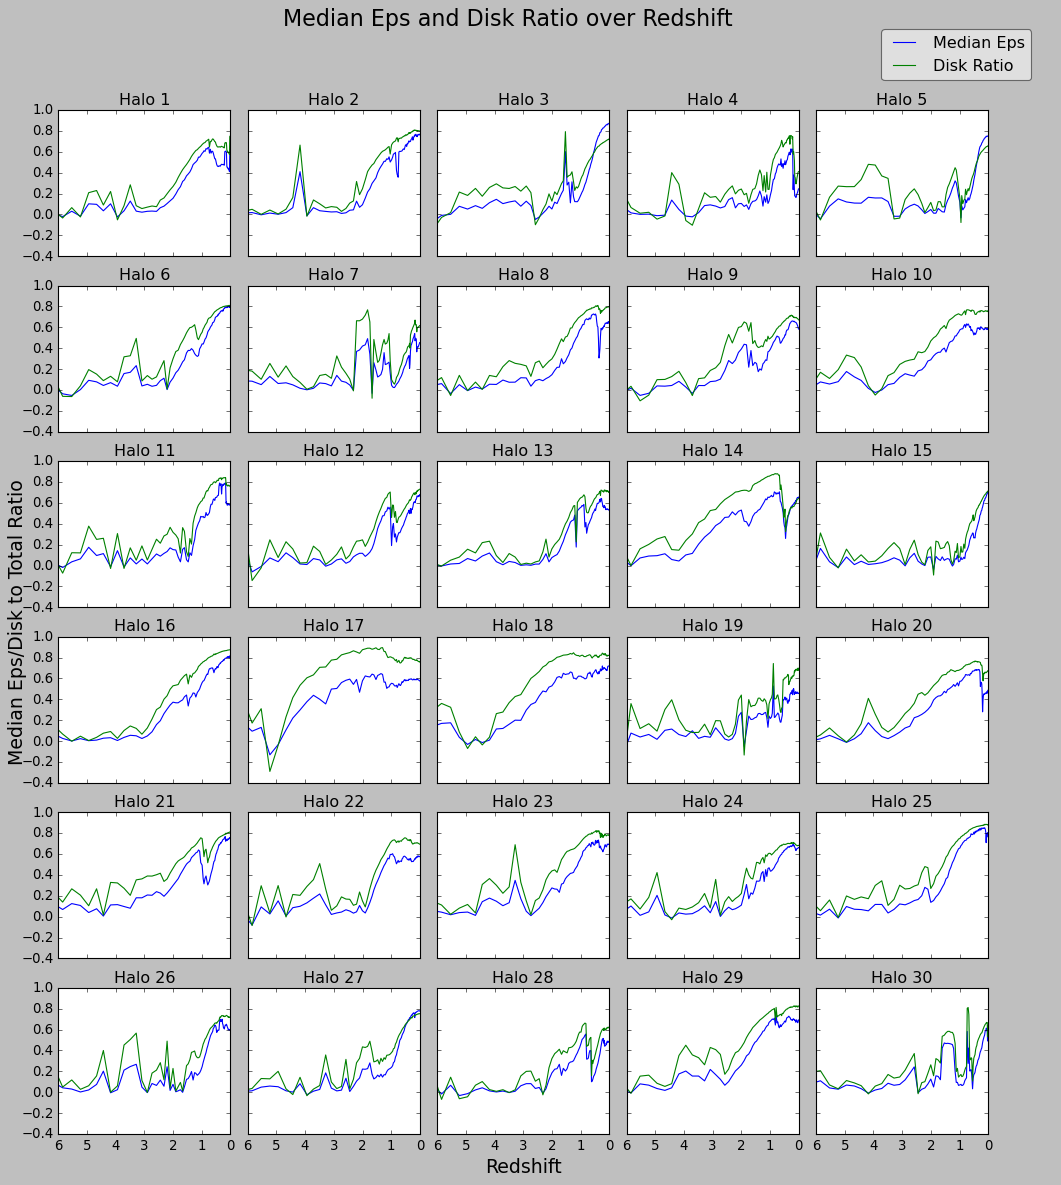

In [ ]:
#All Halos Subplot med eps and disk ratio
#over redshift

fig, axs = plt.subplots(6,5, figsize=(15, 16),sharex=True,sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.1)
xlim(6,0)
ylim(-0.4,1.0)
axs = axs.ravel()

for x in arange(1,31):

    path = '/home/lgvanover/intro_scripts/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")
        
    axs[x-1].plot(df_new['Redshift'][8::],df_new['Med_Eps'][8::],label='Median Eps')
    axs[x-1].plot(df_new['Redshift'][8::],df_new['Disk_Ratio'][8::],label='Disk Ratio')
    axs[x-1].set_title("Halo "+str(x))

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.83,.932),framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Median Eps and Disk Ratio over Redshift", fontsize=20)


In [114]:
import shutil
src = '/cds/kravtsov/Simulations/Auriga/satellite_utilities.py'
dst =  '/home/lgvanover/intro_scripts/satellite_utilities.py'
shutil.copyfile(src, dst)
import satellite_utilities as sat

'/home/lgvanover/intro_scripts/satellite_utilities.py'

Text(0.5, 0.98, 'Median Epsilon and Disk Ratio over Time')

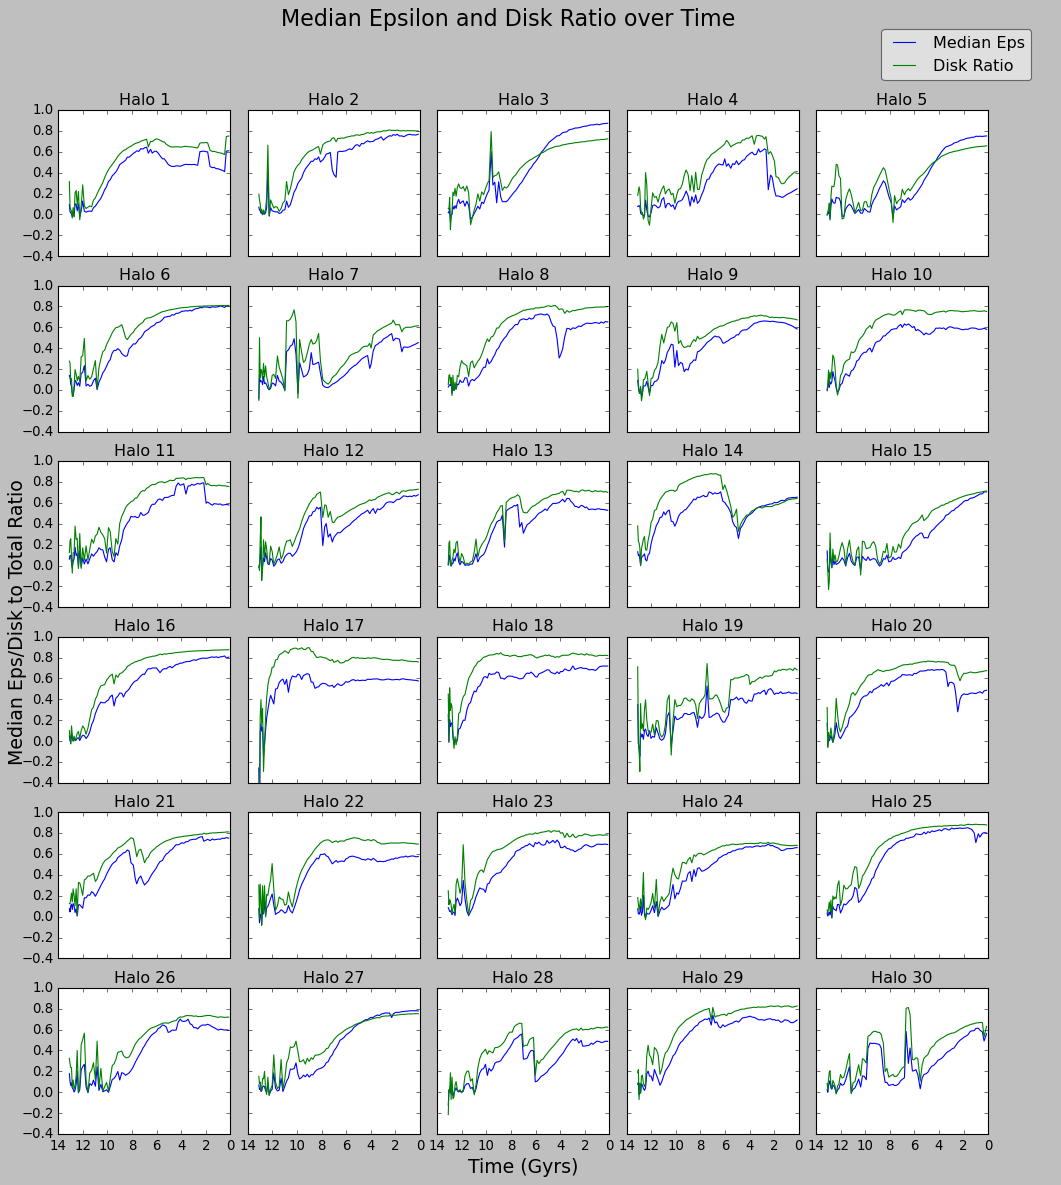

In [9]:
#All Halos Subplot med eps and disk ratio
#Over Gyrs

fig, axs = plt.subplots(6,5, figsize=(15, 16),sharex=True,sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.1)
xlim(14,0)
ylim(-0.4,1.0)
axs = axs.ravel()

for x in arange(1,31):

    path = '/home/lgvanover/intro_scripts/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")
    z = df_new['Redshift']
    lookbacktimes = sat.return_lookbacktime_from_a((z+1.0)**(-1.0))
        
    axs[x-1].plot(lookbacktimes[8::],df_new['Med_Eps'][8::],label='Median Eps')
    axs[x-1].plot(lookbacktimes[8::],df_new['Disk_Ratio'][8::],label='Disk Ratio')
    axs[x-1].set_title("Halo "+str(x))

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.83,.932),framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Time (Gyrs)", fontsize=17)
plt.ylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle('Median Epsilon and Disk Ratio over Time', fontsize=20)


/home/lgvanover/.local/lib/python3.7/site-packages/gadget_snap.py:653: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('uint64'):
/home/lgvanover/.local/lib/python3.7/site-packages/gadget_subfind.py:435: H5pyDeprecationWarning: Using astype() as a context manager is deprecated. Slice the returned object instead, like: ds.astype(np.int32)[:10]
  with dset.astype('int64'):


mass: [0.41172108, 0.43905044, 0.8297421, 0.95635825, 1.0618016, 1.5494071, 1.7144217, 1.9760424, 2.132558, 2.3343947, 2.5361826, 2.6688845, 2.8287063, 3.0008316, 3.297194, 4.3541937, 5.475596, 5.755986, 6.6029987, 7.176502, 11.8978815, 12.721192, 14.2176285, 16.549833, 17.74316, 28.943525, 29.868729, 30.538727, 31.561602, 32.706585, 34.351475, 34.533245, 42.356342, 42.293625, 52.64203, 55.009686, 61.62676, 64.04013, 66.09449, 67.5775, 68.578896, 70.14862, 71.75517, 73.40998, 75.73055, 77.287636, 78.602486, 79.881836, 81.508514, 81.45495, 80.68896, 78.5189, 77.12917, 77.27651, 75.76589, 75.448975, 76.830284, 77.96013, 78.33209, 78.83077, 79.15759, 79.603714, 79.634094, 80.45746, 80.81758, 81.20143, 81.58845, 82.09671, 82.29192, 82.60747, 83.26443, 83.16515, 83.63887, 94.67589, 95.5875, 96.07864, 94.92798, 96.70362, 97.02949, 98.25524, 98.9924, 100.35704, 100.80609, 101.722496, 102.38516, 102.98214, 103.416214, 104.43643, 105.20766, 105.21443, 106.76036, 107.327095, 108.50225, 109.18726

FileNotFoundError: File halo_6.hdf5 does not exist

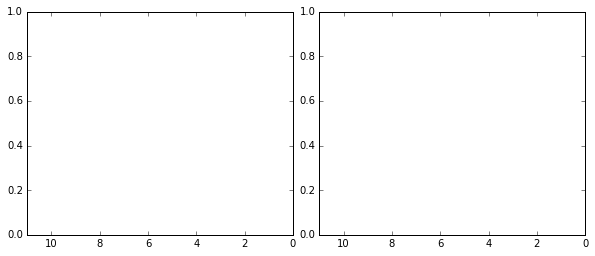

In [3]:
#Mass Accretion
snap = 127
fig, axs = plt.subplots(1,2, figsize=(10, 4),sharex=True,sharey=False)
fig.subplots_adjust(hspace = .3, wspace=.1)
xlim(11,0)

axs = axs.ravel()

for x in arange(6,7):
    if x in (17,18,20):
        continue
    path1 = '/cds/kravtsov/Simulations/Auriga/level4_MHD/halo_'+str(x)+'/output/'
    treebase = '/cds/kravtsov/Simulations/Auriga/level4_MHD/mergertrees/Au-'+str(x)+'/trees_sf1_127'
    mass = []
    redshift = []
    
    for i in list(range(snap)):
        if i < 30:
            continue
        s = gadget_readsnap(i,snappath=path1,hdf5=True,loadonlytype=[4])
        # loadonlytype=[0] for gas accretion
        # look at different values saved for gas like sfr
        # plot summed sfr for all cells vs time (within r200 = .1)
        sf = load_subfind(i,dir=path1,hdf5=True)
        mass.append(sf.data['fmas'][0])
        redshift.append(sf.redshift)

    print('mass:',mass)
    print('len mass:',len(mass))
    print('red len:',len(redshift))
    
    path = '/home/lgvanover/intro_scripts/halos/level4/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")[4:]
    print('reds len:',len(df_new['Redshift']))
        
    axs[0].plot(df_new['Redshift'],df_new['Med_Eps'])
    axs[0].plot(df_new['Redshift'],df_new['Disk_Ratio'])
    axs[0].set_title("Halo "+str(x))
    axs[1].semilogy(redshift,mass)
    axs[1].set_title("Mass Accretion")

Text(0.5, 1.0, 'Distribution of Eps = .5')

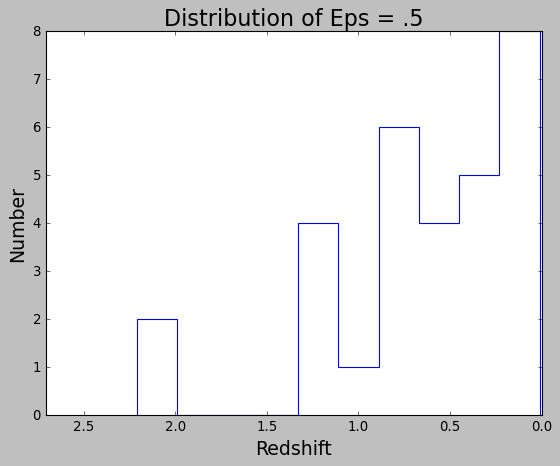

In [78]:
#Circularity Distribution .5
thresh = []

for x in range(1,31):
    path = '/home/lgvanover/intro_scripts/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")
    half, = where(df_new['Med_Eps']<.5)
    thresh.append(df_new['Redshift'][half[-1]])
    lessthanhalf, = where(df_new['Med_Eps']<.2)
    thresh.append(df_new['Redshift'][lessthanhalf[-1]])

hist(thresh,bins=10,histtype='step',density=False)
plt.xlabel("Redshift", fontsize=17)
xlim(max(thresh)+.5,0)
plt.ylabel("Number", fontsize=17)
plt.title("Distribution of Eps = .5", fontsize=20)

Text(0.5, 1.0, 'Distribution of Eps = .2')

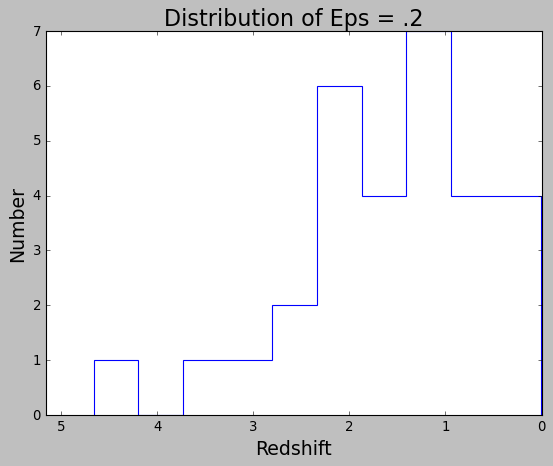

In [76]:
#Circularity Distribution .2
thresh = []

for x in range(1,31):
    path = '/home/lgvanover/intro_scripts/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")
    half, = where(df_new['Med_Eps']<.2)
    thresh.append(df_new['Redshift'][half[-1]])

hist(thresh,bins=10,histtype='step',density=False)
plt.xlabel("Redshift", fontsize=17)
xlim(max(thresh)+.5,0)
plt.ylabel("Number", fontsize=17)
plt.title("Distribution of Eps = .2", fontsize=20)

Text(0.5, 1.0, 'Distribution of Eps = .7')

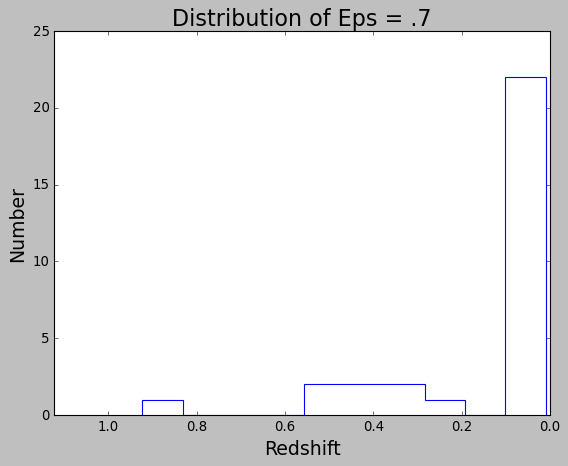

In [4]:
#Circularity Distribution .7
thresh = []

for x in range(1,31):
    path = '/home/lgvanover/intro_scripts/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf("halo_"+str(x)+".hdf5", "table")
    half, = where(df_new['Med_Eps']<.7)
    thresh.append(df_new['Redshift'][half[-1]])

hist(thresh,bins=10,histtype='step',density=False)
plt.xlabel("Redshift", fontsize=17)
xlim(max(thresh)+.2,0)
plt.ylabel("Number", fontsize=17)
plt.title("Distribution of Eps = .7", fontsize=20)

Text(0.5, 1.0, 'Circularity Growth Rate')

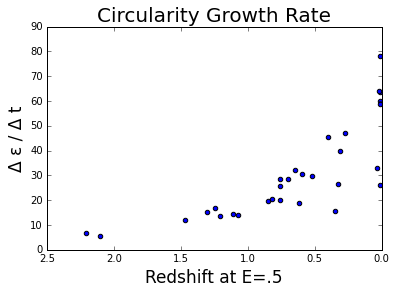

In [18]:
#Slopes
x_data = []
y_data = []

for x in arange(1,31):

    path = '/home/lgvanover/intro_scripts/halos/level4/halo_'+str(x)+'.hdf5'
    df_new = pd.read_hdf(path, "table")
    thresh_5, = where(df_new['Med_Eps']<.5)
    thresh_2, = where(df_new['Med_Eps']<.2)
    delta_e = thresh_5[-1] - thresh_2[-1]
    delta_t = abs(df_new['Redshift'][thresh_5[-1]] - df_new['Redshift'][thresh_2[-1]])
    y_data.append(delta_e / delta_t)
    x_data.append(df_new['Redshift'][thresh_5[-1]])

xlim(2.5,0)
plt.scatter(x_data,y_data)
plt.xlabel("Redshift at E=.5", fontsize=17)
plt.ylabel("\u0394 \u03B5 / \u0394 t", fontsize=17)
title("Circularity Growth Rate", fontsize=20)


Text(0.5, 0.98, 'Median Eps and Disk Ratio over Redshift Level 3')

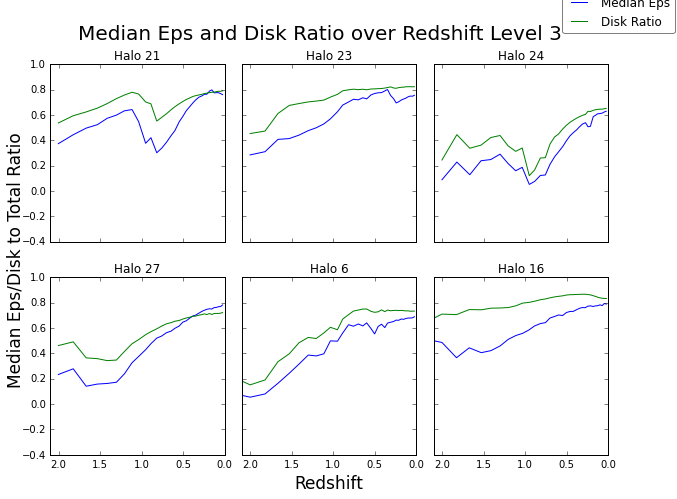

In [3]:
#All Halos Subplot for level 3 simulation
#over redshift

fig, axs = plt.subplots(2,3, figsize=(10,7),sharex=True,sharey=True)
fig.subplots_adjust(hspace = .2, wspace=.1)
xlim(2.1,0)
ylim(-0.4,1.0)
axs = axs.ravel()
halos_level_3 = [16, 21, 23, 24, 27, 6]

for x, halo in enumerate(halos_level_3):

    path = '/home/lgvanover/intro_scripts/halos/level3/halo_'+str(halo)+'_level3.hdf5'
    df_new = pd.read_hdf(path, "table")
        
    axs[x-1].plot(df_new['Redshift'],df_new['Med_Eps'],label='Median Eps')
    axs[x-1].plot(df_new['Redshift'],df_new['Disk_Ratio'],label='Disk Ratio')
    axs[x-1].set_title("Halo "+str(halo))

    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.83,.932),framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Median Eps and Disk Ratio over Redshift Level 3", fontsize=20)


Text(0.5, 0.98, 'Halo 16 Median Eps and Disk Ratio')

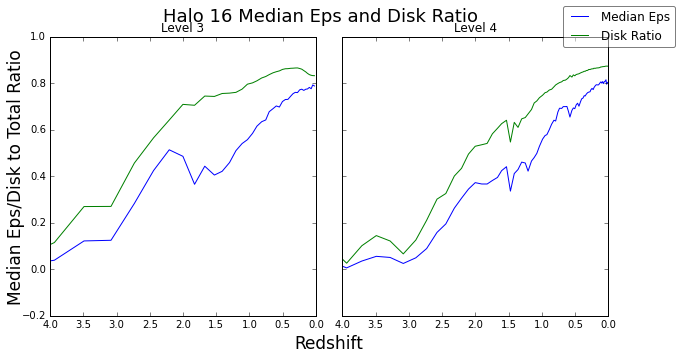

In [10]:
#comparison levels halo 16
#over redshift

fig, axs = plt.subplots(1,2, figsize=(10,5,), sharex=True,sharey=True)
fig.subplots_adjust(hspace = .3, wspace=.1)
xlim(4,0)
ylim(-0.2,1.0)
axs = axs.ravel()

df_level3 = pd.read_hdf("halos/level3/halo_16_level3.hdf5", "table")
df_level4 = pd.read_hdf("halos/level4/halo_16.hdf5", "table")
    
axs[0].plot(df_level3['Redshift'],df_level3['Med_Eps'],label='Median Eps')
axs[0].plot(df_level3['Redshift'],df_level3['Disk_Ratio'],label='Disk Ratio')
axs[0].set_title('Level 3')

axs[1].plot(df_level4['Redshift'],df_level4['Med_Eps'],label='Median Eps')
axs[1].plot(df_level4['Redshift'],df_level4['Disk_Ratio'],label='Disk Ratio')
axs[1].set_title('Level 4')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Halo 16 Median Eps and Disk Ratio", fontsize=18)


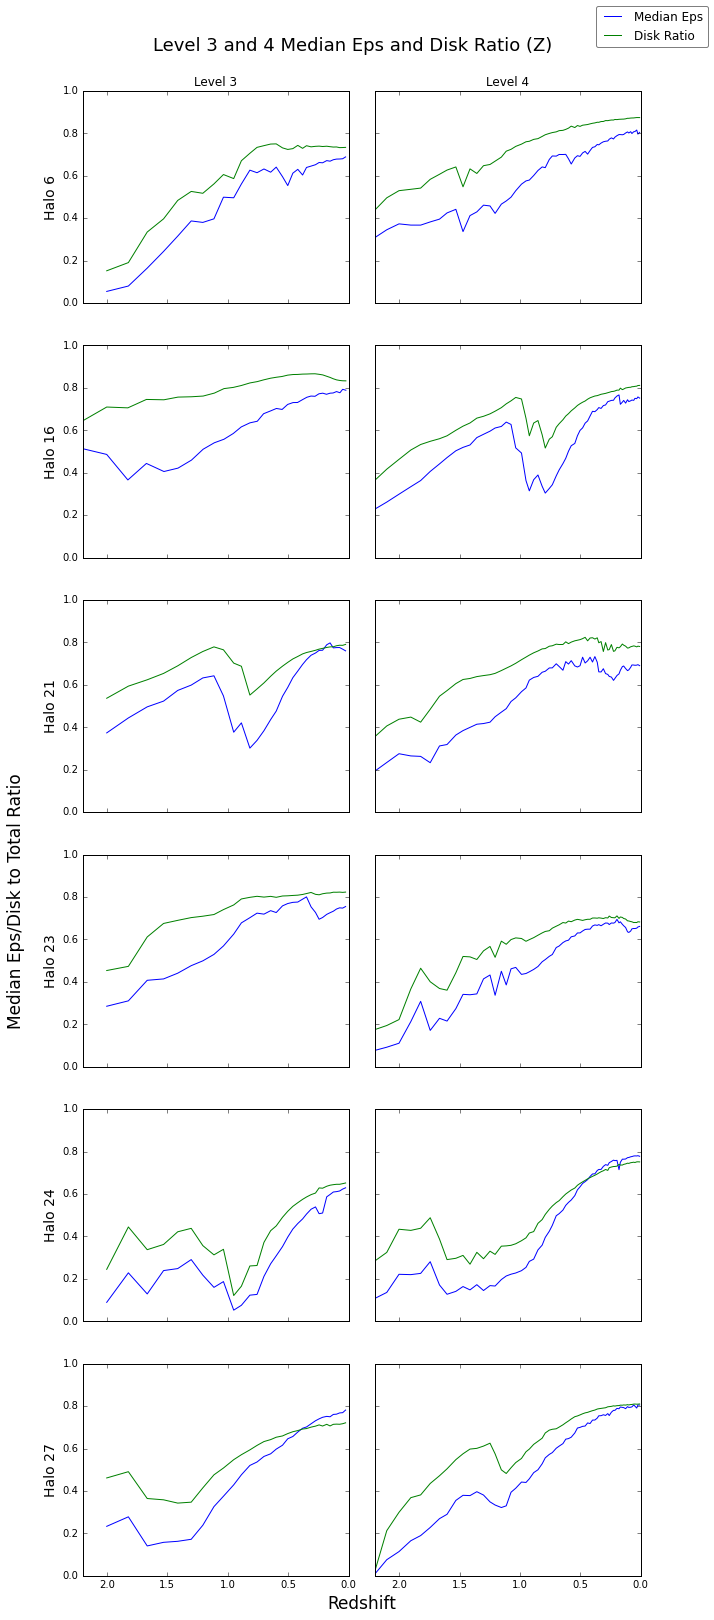

In [3]:
#comparison levels all halos in level 3
#over redshift

fig, axs = plt.subplots(6,2, figsize=(10,25), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(2.2,0)
ylim(0,1.0)
axs = axs.ravel()
halos_level_3 = [6, 16, 21, 23, 24, 27]
row_labels = []

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halo_"+str(halo)+"_level3.hdf5", "table")
    df_level4 = pd.read_hdf("halo_"+str(halo)+".hdf5", "table")
    row_labels.append(halo)
        
    axs[2*x].plot(df_level3['Redshift'],df_level3['Med_Eps'],label='Median Eps')
    axs[2*x].plot(df_level3['Redshift'],df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[2*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[2*x-1].plot(df_level4['Redshift'],df_level4['Med_Eps'],label='Median Eps')
    axs[2*x-1].plot(df_level4['Redshift'],df_level4['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
axs[0].set_title('Level 3')
axs[1].set_title('Level 4')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 and 4 Median Eps and Disk Ratio (Z)", fontsize=18)
fig.subplots_adjust(top=0.95)

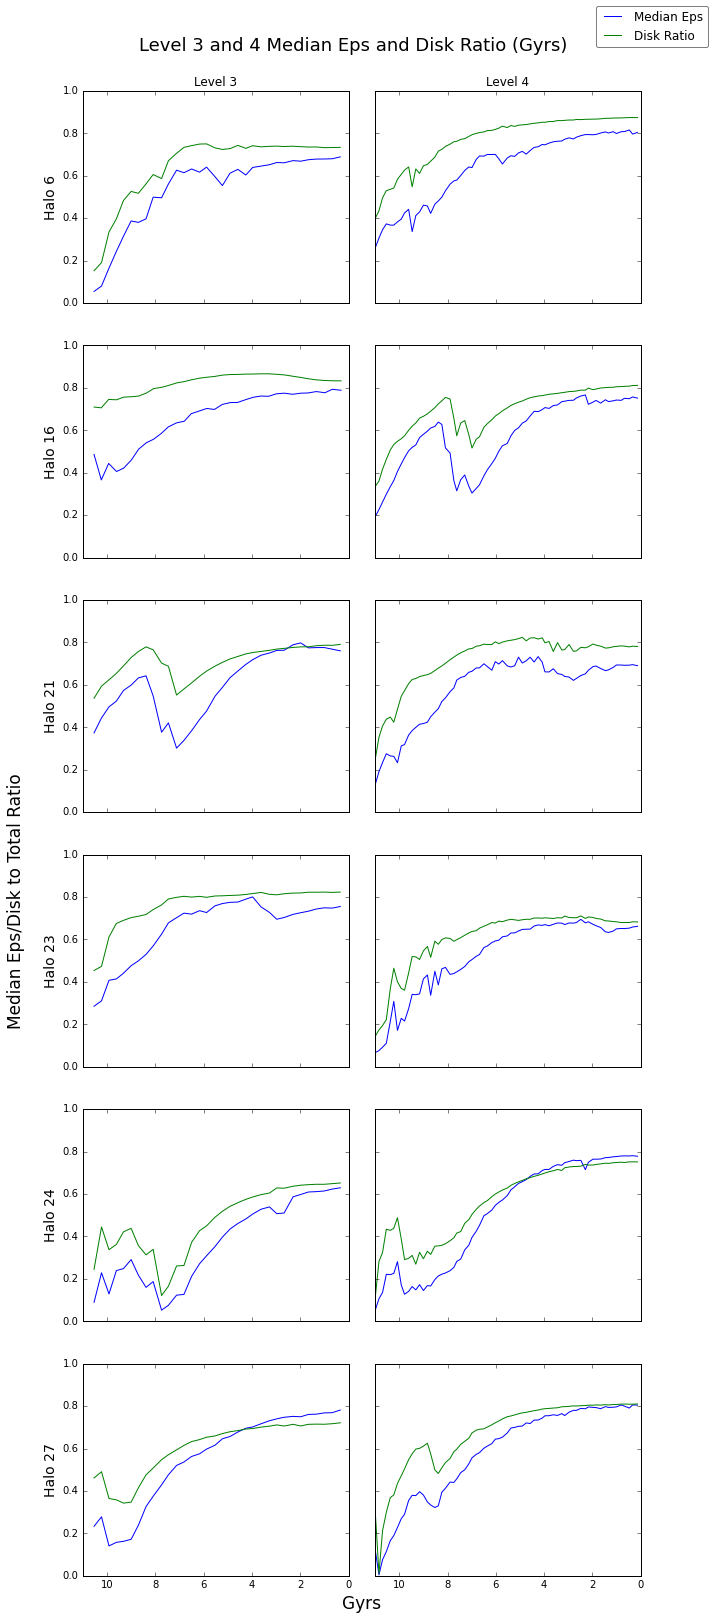

In [95]:
#comparison levels all halos in level 3
#over Gyrs

fig, axs = plt.subplots(6,2, figsize=(10,25), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(11,0)
ylim(0,1.0)
axs = axs.ravel()
halos_level_3 = [6, 16, 21, 23, 24, 27]

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halo_"+str(halo)+"_level3.hdf5", "table")
    df_level4 = pd.read_hdf("halo_"+str(halo)+".hdf5", "table")

    z3 = df_level3['Redshift']
    lookbacktimes3 = sat.return_lookbacktime_from_a((z3+1.0)**(-1.0))
    z4 = df_level4['Redshift']
    lookbacktimes4 = sat.return_lookbacktime_from_a((z4+1.0)**(-1.0))
        
    axs[2*x].plot(lookbacktimes3,df_level3['Med_Eps'],label='Median Eps')
    axs[2*x].plot(lookbacktimes3,df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[2*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[2*x-1].plot(lookbacktimes4,df_level4['Med_Eps'],label='Median Eps')
    axs[2*x-1].plot(lookbacktimes4,df_level4['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gyrs", fontsize=17)
axs[0].set_title('Level 3')
axs[1].set_title('Level 4')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 and 4 Median Eps and Disk Ratio (Gyrs)", fontsize=18)
fig.subplots_adjust(top=0.95)

Text(0.5, 1.0, 'Final Epsilon Values')

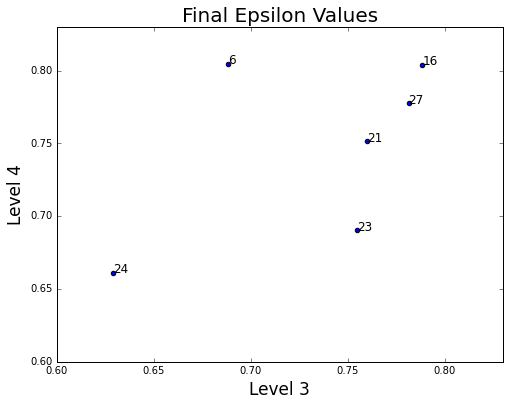

In [14]:
#Final Circularity Distribution 
halos_level_3 = [6, 16, 21, 23, 24, 27]
final_circ3 = []
final_circ4 = []

for x in halos_level_3:
    df_4 = pd.read_hdf("halos/level4/halo_"+str(x)+".hdf5", "table")
    final_circ4.append(df_4.iloc[-1,1])
    df_3 = pd.read_hdf("halos/level3/halo_"+str(x)+"_level3.hdf5", "table")
    final_circ3.append(df_3.iloc[-1,1])

figure(figsize=(8,6))
plt.scatter(final_circ3, final_circ4)
for i, halo in enumerate(halos_level_3):
    plt.annotate(halo, (final_circ3[i], final_circ4[i]), fontsize=12)

plt.xlabel("Level 3", fontsize=17)
plt.ylabel("Level 4", fontsize=17)
xlim(.6,.83)
ylim(.6,.83)
plt.title("Final Epsilon Values", fontsize=20)

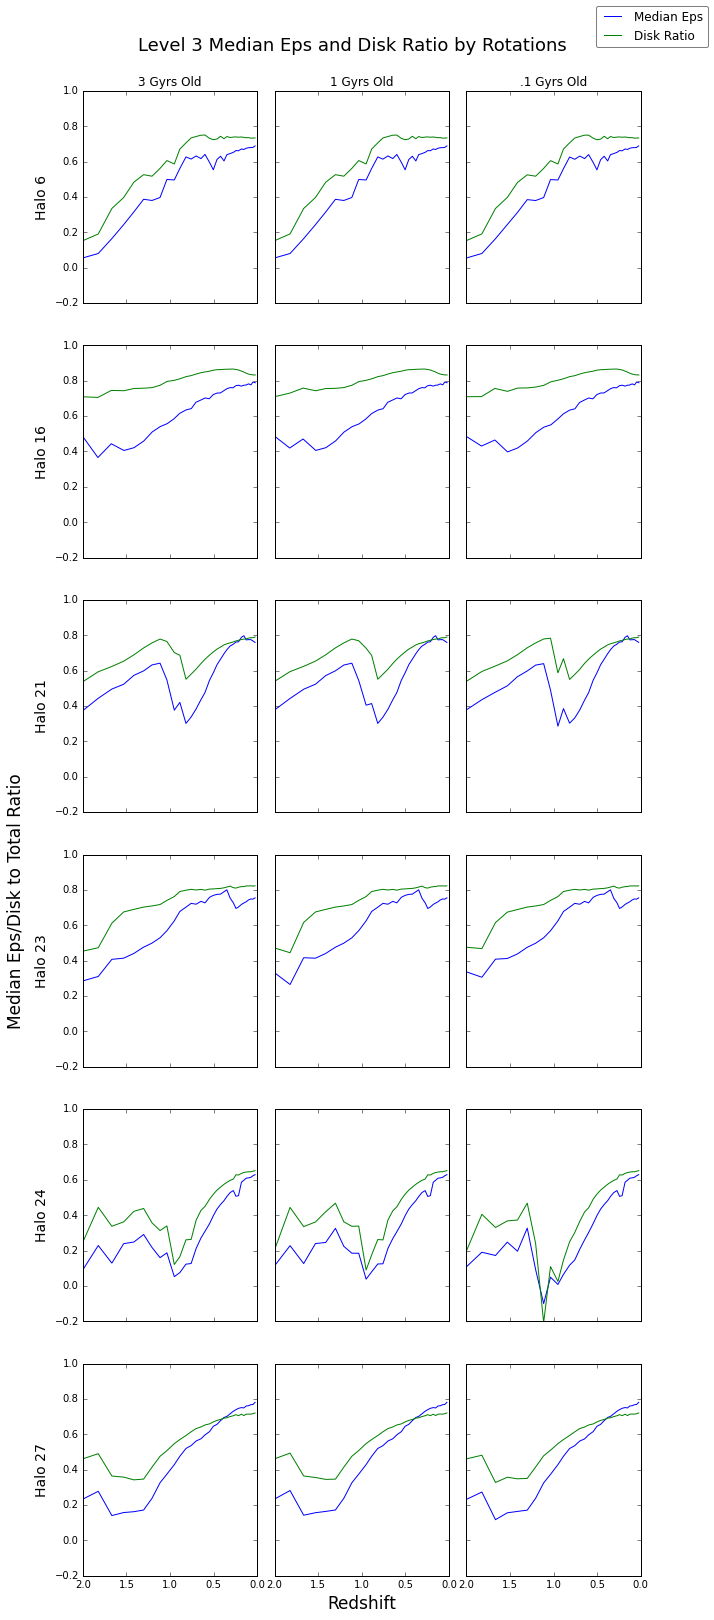

In [5]:
# comparing cuts of 3 and .1 Gyrs
#over Redshift

fig, axs = plt.subplots(6,3, figsize=(10,25), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(2,0)
ylim(-.2,1.0)
axs = axs.ravel()
halos_level_3 = [6, 16, 21, 23, 24, 27]

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halos/level3/halo_"+str(halo)+"_level3.hdf5", "table")
    df_youngest = pd.read_hdf("halos/level3/young001/halo_"+str(halo)+"_level3.hdf5", "table")
    df_younger = pd.read_hdf("halos/level3/young1/halo_"+str(halo)+"_level3.hdf5", "table")
        
    axs[3*x].plot(df_level3['Redshift'],df_level3['Med_Eps'],label='Median Eps')
    axs[3*x].plot(df_level3['Redshift'],df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[3*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[3*x+1].plot(df_younger['Redshift'],df_younger['Med_Eps'],label='Median Eps')
    axs[3*x+1].plot(df_younger['Redshift'],df_younger['Disk_Ratio'],label='Disk Ratio')

    axs[3*x+2].plot(df_youngest['Redshift'],df_youngest['Med_Eps'],label='Median Eps')
    axs[3*x+2].plot(df_youngest['Redshift'],df_youngest['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
axs[0].set_title('3 Gyrs Old')
axs[1].set_title('1 Gyrs Old')
axs[2].set_title('.1 Gyrs Old')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 Median Eps and Disk Ratio by Rotations", fontsize=18)
fig.subplots_adjust(top=0.95)

In [14]:
df_level3 = pd.read_hdf("halos/level3/halo_6_level3.hdf5", "table")


In [15]:
df_level3
# redshift 2 at snap 30 for halo 6?
# redshift 2 at snap 20 for halo 24?

,Redshift,Med_Eps,Disk_Ratio,Med_SMass,Med_Velocity,Med_Position
0,6.144901,0.055266,0.119853,6.053684e-07,-7.426742,2.637126e-05
1,5.529766,0.004815,0.018765,5.864359e-07,-3.178945,-3.542790e-06
2,4.939381,0.079243,0.180326,5.833676e-07,-2.636793,2.139290e-05
3,4.428034,0.054036,0.113885,5.550208e-07,-0.784371,-1.121065e-06
4,3.937261,0.067538,0.134239,5.459032e-07,-2.653621,-9.519823e-07
5,3.490861,0.084104,0.185511,5.455660e-07,-4.283832,1.473147e-05
6,3.084823,0.042140,0.105149,5.420712e-07,-5.981024,-7.366180e-05
7,2.733143,0.083834,0.204738,5.218262e-07,-0.964390,-5.336989e-05
8,2.444226,0.096705,0.242364,5.119711e-07,0.890986,2.057961e-05
9,2.207925,0.084502,0.213610,5.054445e-07,-8.524693,-9.113452e-06


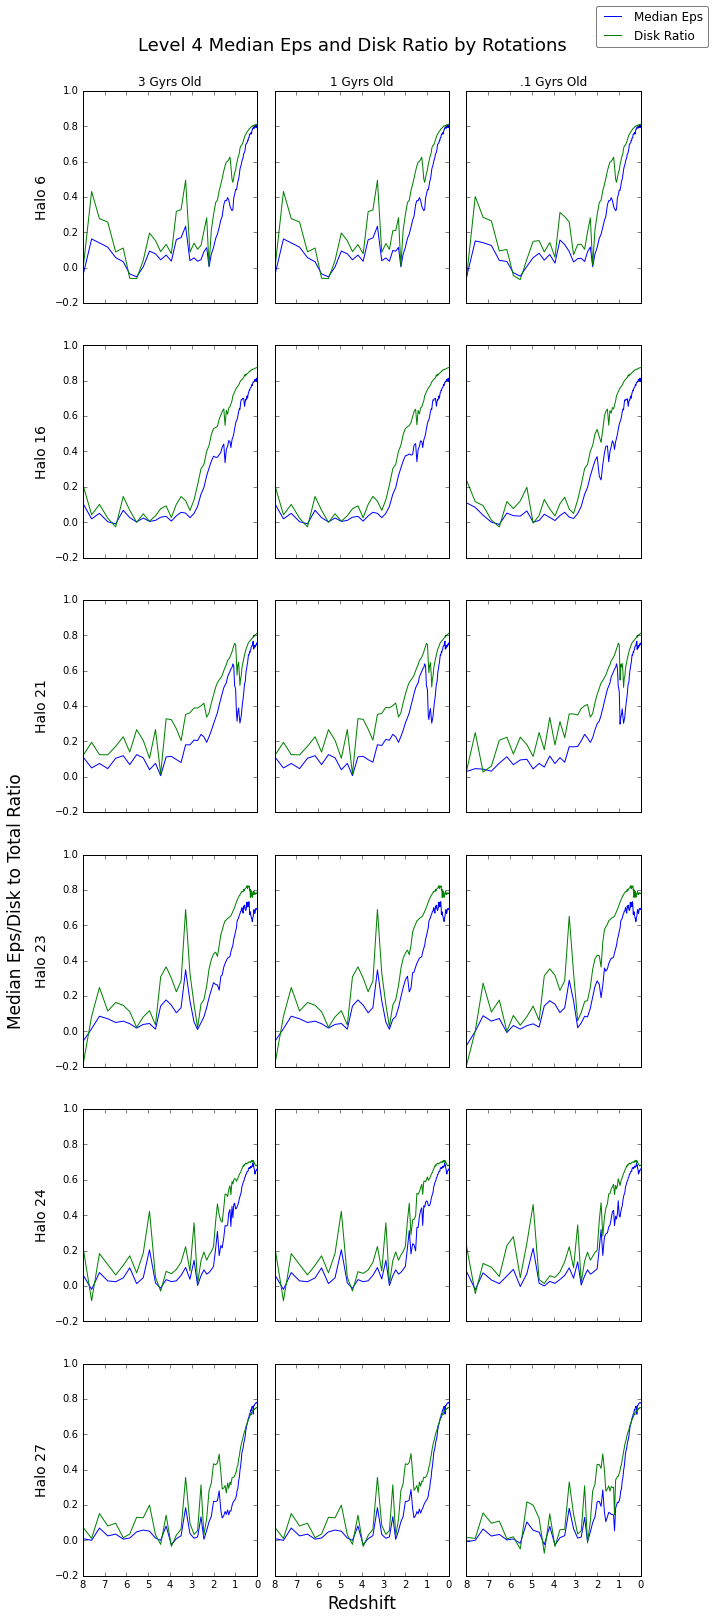

In [9]:
# comparing cuts of 3 and .1 Gyrs LEVEL 4
#over Redshift

fig, axs = plt.subplots(6,3, figsize=(10,25), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(8,0)
ylim(-.2,1.0)
axs = axs.ravel()
halos_level_3 = [6, 16, 21, 23, 24, 27]

for x, halo in enumerate(halos_level_3):

    df_level4 = pd.read_hdf("halos/level4/halo_"+str(halo)+".hdf5", "table")
    df_youngest = pd.read_hdf("halos/level4/young01/halo_"+str(halo)+".hdf5", "table")
    df_younger = pd.read_hdf("halos/level4/young1/halo_"+str(halo)+".hdf5", "table")
        
    axs[3*x].plot(df_level4['Redshift'],df_level4['Med_Eps'],label='Median Eps')
    axs[3*x].plot(df_level4['Redshift'],df_level4['Disk_Ratio'],label='Disk Ratio')
    axs[3*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[3*x+1].plot(df_younger['Redshift'],df_younger['Med_Eps'],label='Median Eps')
    axs[3*x+1].plot(df_younger['Redshift'],df_younger['Disk_Ratio'],label='Disk Ratio')

    axs[3*x+2].plot(df_youngest['Redshift'],df_youngest['Med_Eps'],label='Median Eps')
    axs[3*x+2].plot(df_youngest['Redshift'],df_youngest['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
axs[0].set_title('3 Gyrs Old')
axs[1].set_title('1 Gyrs Old')
axs[2].set_title('.1 Gyrs Old')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 4 Median Eps and Disk Ratio by Rotations", fontsize=18)
fig.subplots_adjust(top=0.95)

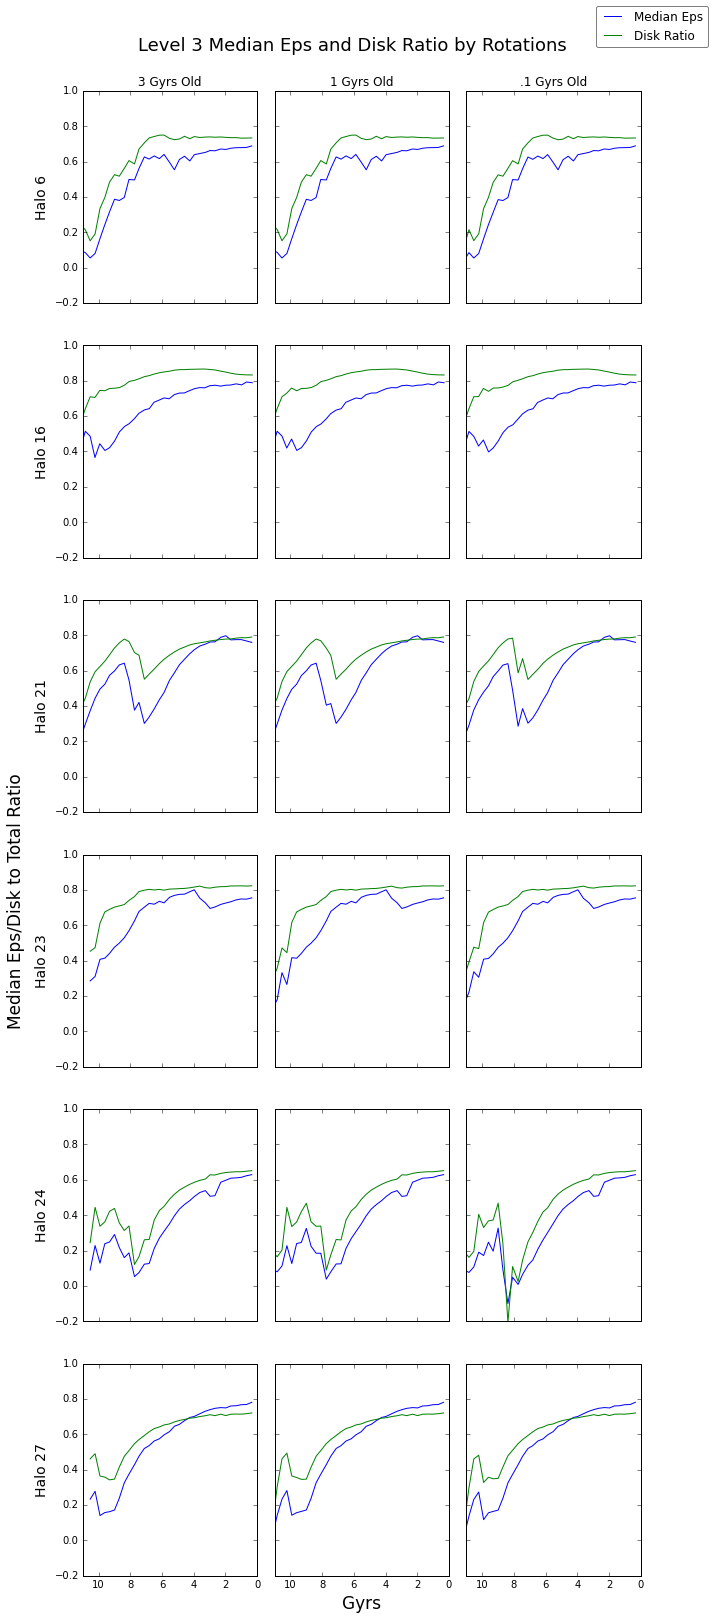

In [4]:
# comparing cuts of 3 and .1 Gyrs
#over Gyrs

fig, axs = plt.subplots(6,3, figsize=(10,25), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(11,0)
ylim(-.2,1.0)
axs = axs.ravel()
halos_level_3 = [6, 16, 21, 23, 24, 27]

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halos/level3/halo_"+str(halo)+"_level3.hdf5", "table")
    df_youngest = pd.read_hdf("halos/level3/young001/halo_"+str(halo)+"_level3.hdf5", "table")
    df_younger = pd.read_hdf("halos/level3/young1/halo_"+str(halo)+"_level3.hdf5", "table")

    z3 = df_level3['Redshift']
    lookbacktimes3 = sat.return_lookbacktime_from_a((z3+1.0)**(-1.0))
    zy1 = df_youngest['Redshift']
    lookbacktimesy1 = sat.return_lookbacktime_from_a((zy1+1.0)**(-1.0))
    zy = df_younger['Redshift']
    lookbacktimesy = sat.return_lookbacktime_from_a((zy+1.0)**(-1.0))

        
    axs[3*x].plot(lookbacktimes3,df_level3['Med_Eps'],label='Median Eps')
    axs[3*x].plot(lookbacktimes3,df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[3*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[3*x+1].plot(lookbacktimesy,df_younger['Med_Eps'],label='Median Eps')
    axs[3*x+1].plot(lookbacktimesy,df_younger['Disk_Ratio'],label='Disk Ratio')

    axs[3*x+2].plot(lookbacktimesy1,df_youngest['Med_Eps'],label='Median Eps')
    axs[3*x+2].plot(lookbacktimesy1,df_youngest['Disk_Ratio'],label='Disk Ratio')

lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gyrs", fontsize=17)
axs[0].set_title('3 Gyrs Old')
axs[1].set_title('1 Gyrs Old')
axs[2].set_title('.1 Gyrs Old')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 Median Eps and Disk Ratio by Rotations", fontsize=18)
fig.subplots_adjust(top=0.95)

Text(0.5, 1.0, 'Final Epsilon Values')

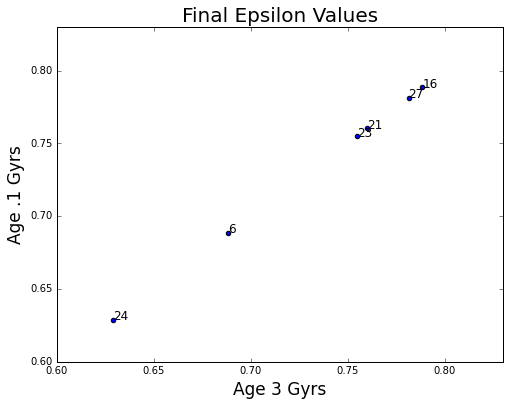

In [11]:
#Final Circularity Distribution age 3 vs age .1
halos_level_3 = [6, 16, 21, 23, 24, 27]
final_circ30 = []
final_circ01 = []

for halo in halos_level_3:
    df_level3 = pd.read_hdf("halos/level3/halo_"+str(halo)+"_level3.hdf5", "table")
    final_circ30.append(df_level3.iloc[-1,1])
    df_young = pd.read_hdf("halos/level3/young001/halo_"+str(halo)+"_level3.hdf5", "table")
    final_circ01.append(df_young.iloc[-1,1])

figure(figsize=(8,6))
plt.scatter(final_circ30, final_circ01)
for i, halo in enumerate(halos_level_3):
    plt.annotate(halo, (final_circ30[i], final_circ01[i]), fontsize=12)

# m, b = np.polyfit(final_circ30, final_circ30, 1)
# plt.plot(final_circ30, final_circ01, '--k')
# print('m = ', m)
# print('b = ', b)

plt.xlabel("Age 3 Gyrs", fontsize=17)
plt.ylabel("Age .1 Gyrs", fontsize=17)
xlim(.6,.83)
ylim(.6,.83)
plt.title("Final Epsilon Values", fontsize=20)


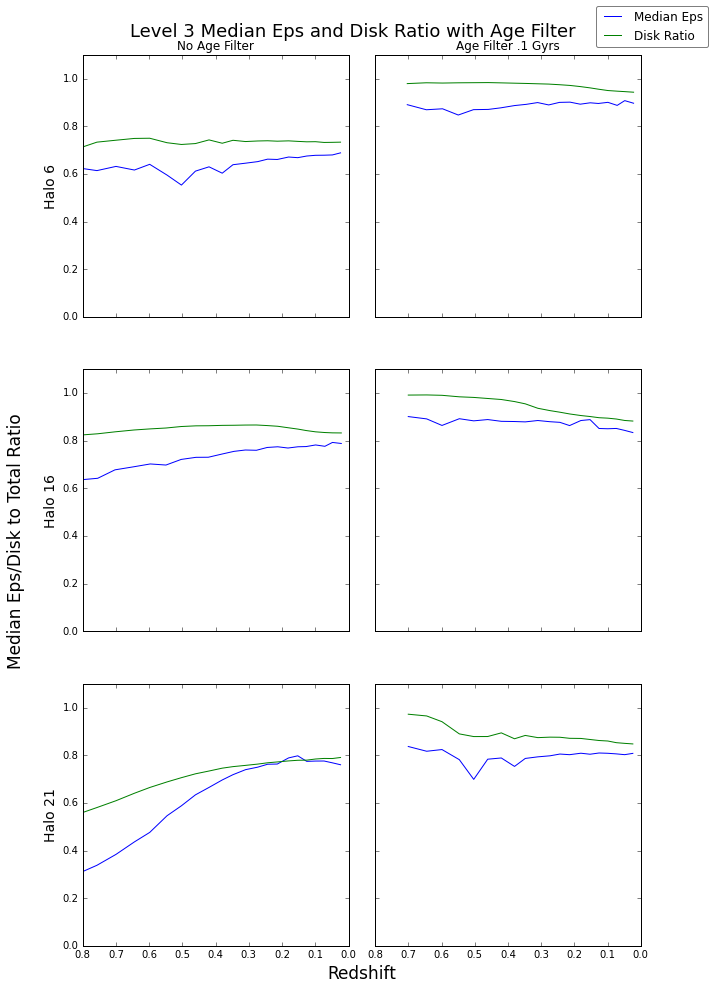

In [3]:
# comparing level 3 with age filter of .1 (rotated at 3.)
#over Redshift

fig, axs = plt.subplots(3,2, figsize=(10,15), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(.8,0)
ylim(0,1.1)
axs = axs.ravel()
halos_level_3 = [6, 16, 21]

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halos/level3/halo_"+str(halo)+"_level3.hdf5", "table")
    df_agefilt = pd.read_hdf("halos/level3/age_filt/age1/halo_"+str(halo)+"level3.hdf5", "table")

    not_nan = where(df_agefilt['Med_Eps'] is not None)
        
    axs[2*x].plot(df_level3['Redshift'],df_level3['Med_Eps'],label='Median Eps')
    axs[2*x].plot(df_level3['Redshift'],df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[2*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[2*x-1].plot(df_agefilt['Redshift'],df_agefilt['Med_Eps'],label='Median Eps')
    axs[2*x-1].plot(df_agefilt['Redshift'],df_agefilt['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
axs[0].set_title('No Age Filter')
axs[1].set_title('Age Filter .1 Gyrs')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 Median Eps and Disk Ratio with Age Filter", fontsize=18)
fig.subplots_adjust(top=0.95)

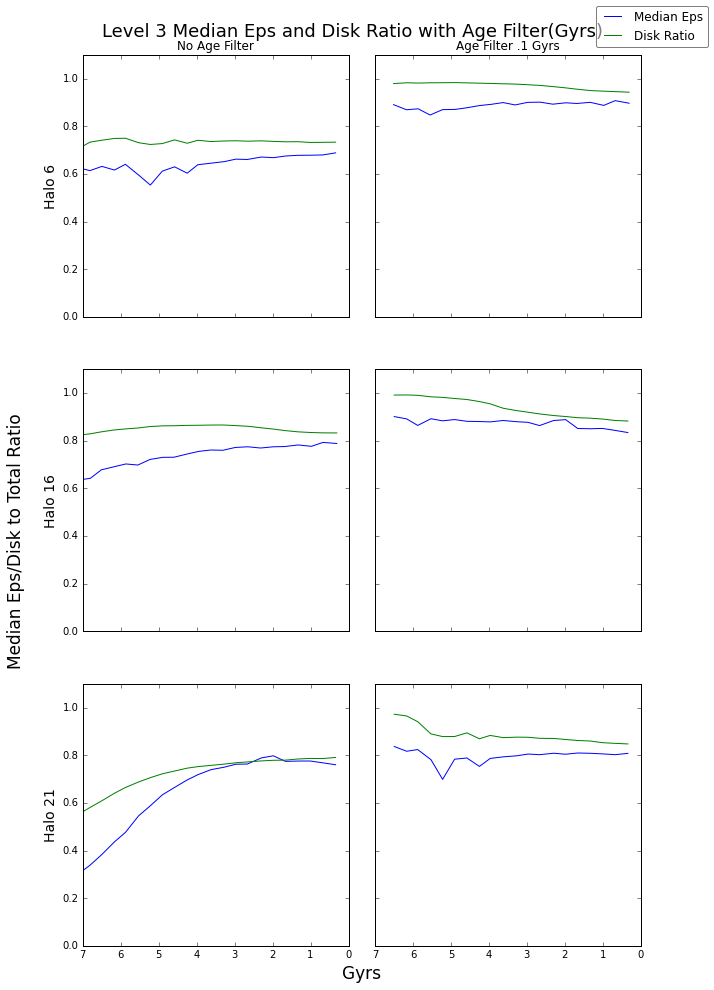

In [6]:
# comparing level 3 with age filter of .1 (rotated at 3.)
#over Gyrs

fig, axs = plt.subplots(3,2, figsize=(10,15), sharex=True,sharey=True)
fig.subplots_adjust(hspace = 0.2, wspace=.1)
xlim(7,0)
ylim(0,1.1)
axs = axs.ravel()
halos_level_3 = [6, 16, 21]

for x, halo in enumerate(halos_level_3):

    df_level3 = pd.read_hdf("halos/level3/halo_"+str(halo)+"_level3.hdf5", "table")
    df_agefilt = pd.read_hdf("halos/level3/age_filt/age1/halo_"+str(halo)+"level3.hdf5", "table")

    not_nan = where(df_agefilt['Med_Eps'] is not None)
    z3 = df_level3['Redshift']
    lookbacktimes3 = sat.return_lookbacktime_from_a((z3+1.0)**(-1.0))
    zy = df_agefilt['Redshift']
    lookbacktimesy = sat.return_lookbacktime_from_a((zy+1.0)**(-1.0))
        
    axs[2*x].plot(lookbacktimes3,df_level3['Med_Eps'],label='Median Eps')
    axs[2*x].plot(lookbacktimes3,df_level3['Disk_Ratio'],label='Disk Ratio')
    axs[2*x].set_ylabel('Halo '+str(halo), fontsize=14)

    axs[2*x-1].plot(lookbacktimesy,df_agefilt['Med_Eps'],label='Median Eps')
    axs[2*x-1].plot(lookbacktimesy,df_agefilt['Disk_Ratio'],label='Disk Ratio')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Gyrs", fontsize=17)
axs[0].set_title('No Age Filter')
axs[1].set_title('Age Filter .1 Gyrs')
fig.supylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Level 3 Median Eps and Disk Ratio with Age Filter(Gyrs)", fontsize=18)
fig.subplots_adjust(top=0.95)

[0.8077261009680854, 0.896713857437766, 0.8344025639262663]
[0.6883976033628426, 0.7885209844379365, 0.7599646189947102]


Text(0.5, 1.0, 'Final Epsilon Values')

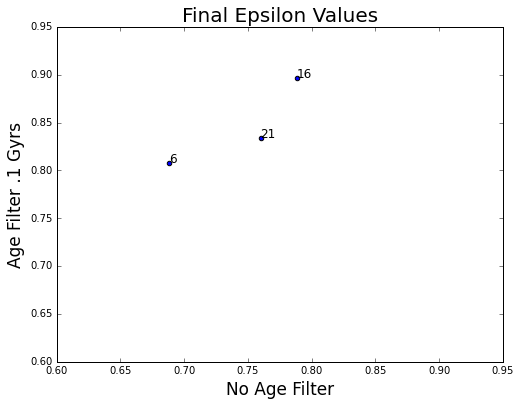

In [36]:
#Final Circularity Distribution w Age Filter
halos_level_3 = [6, 16, 21]
final_circ3 = []
final_circy = []

for x in halos_level_3:
    df_y = pd.read_hdf("halos/level3/age_filt/age1/halo_"+str(x)+"level3.hdf5", "table")
    final_circy.append(df_y.iloc[-1,1])
    df_3 = pd.read_hdf("halos/level3/halo_"+str(x)+"_level3.hdf5", "table")
    final_circ3.append(df_3.iloc[-1,1])

figure(figsize=(8,6))
plt.scatter(final_circ3, final_circy)
for i, halo in enumerate(halos_level_3):
    plt.annotate(halo, (final_circ3[i], final_circy[i]), fontsize=12)
print(final_circy)
print(final_circ3)

plt.xlabel("No Age Filter", fontsize=17)
plt.ylabel("Age Filter .1 Gyrs", fontsize=17)
xlim(.6,.95)
ylim(.6,.95)
plt.title("Final Epsilon Values", fontsize=20)

Text(0.5, 0.98, 'Halo 24 Median Eps and Disk Ratio')

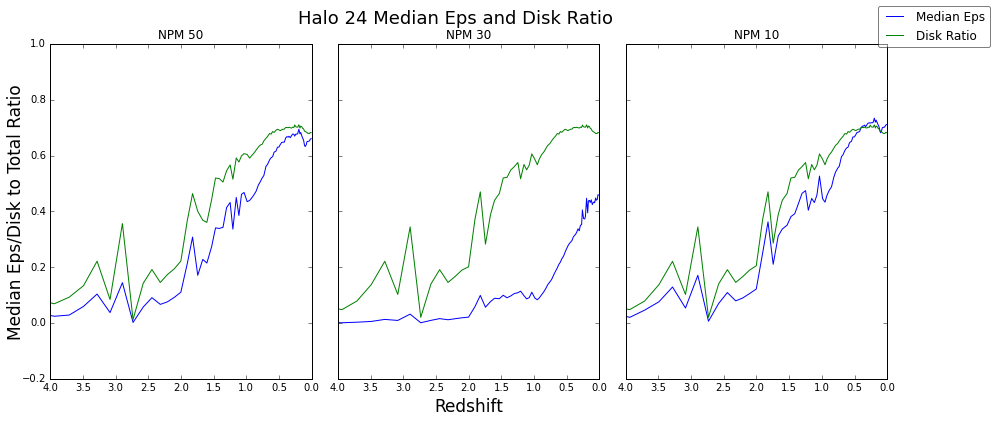

In [21]:
#comparison of npm values for halo 24
#over redshift

fig, axs = plt.subplots(1,3, figsize=(15,6), sharex=True,sharey=True)
fig.subplots_adjust(hspace = .4, wspace=.1)
xlim(4,0)
ylim(-0.2,1.0)
axs = axs.ravel()

df_npm50 = pd.read_hdf("halos/level4/halo_24.hdf5", "table")
df_npm30 = pd.read_hdf("halos/level4/test/halo_24test1.hdf5", "table")
df_npm10 = pd.read_hdf("halos/level4/test/halo_24.hdf5", "table")
    
axs[0].plot(df_npm50['Redshift'],df_npm50['Med_Eps'],label='Median Eps')
axs[0].plot(df_npm50['Redshift'],df_npm50['Disk_Ratio'],label='Disk Ratio')
axs[0].set_title('NPM 50')

axs[1].plot(df_npm30['Redshift'],df_npm30['Med_Eps'],label='Median Eps')
axs[1].plot(df_npm30['Redshift'],df_npm30['Disk_Ratio'],label='Disk Ratio')
axs[1].set_title('NPM 30')

axs[2].plot(df_npm10['Redshift'],df_npm10['Med_Eps'],label='Median Eps')
axs[2].plot(df_npm10['Redshift'],df_npm10['Disk_Ratio'],label='Disk Ratio')
axs[2].set_title('NPM 10')
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels,framealpha=.5,fancybox=True)    

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Redshift", fontsize=17)
plt.ylabel("Median Eps/Disk to Total Ratio", fontsize=17)
fig.suptitle("Halo 24 Median Eps and Disk Ratio", fontsize=18)


In [ ]:
# redshift 2 at snap 30 for halo 6?
# redshift 2 at snap 20 for halo 24?

In [ ]:
# for halo 24, snapshots only exist for 22:63

In [ ]:
# (e_new - e_old)/e_old vs. e_old
# (e_new - e_old)/e_old vs. E

In [3]:
# redshift 0
df_6_new = pd.read_hdf("halos/new/level3_halo6_new.hdf5", "table")
df_24_new = pd.read_hdf("halos/new/level3_halo24_new.hdf5", "table")
df_6_old = pd.read_hdf("halos/new/level3_halo6_old.hdf5", "table")
df_24_old = pd.read_hdf("halos/new/level3_halo24_old.hdf5", "table")


In [60]:
df_6_new = pd.read_hdf("halos/new/level3_halo6_new.hdf5", "table")


In [2]:
df_6_old = pd.read_hdf("halos/new/level3_halo6_old.hdf5", "table")

In [14]:
df_6_new

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[0.9999323369314964, -0.14696236673449586, 0.3...","[-363657.8, -363523.12, -363984.28, -363349.97..."


In [10]:
df_6_old

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[-0.29844295843714574, 0.8256705465520378, -1....","[-363984.28125, -363657.8125, -363653.9375, -3..."


In [3]:
df_6_old

,Redshift,Epsilon,Spec Energy,Jz,Jz Max
0,2.220446e-16,"[-0.07932361577336677, -0.06896694492640609, 0...","[-363984.28125, -363657.8125, -363653.9375, -3...","[-7.536375126987688e-05, -6.552408929677262e-0...","[0.0009500796267935703, 0.0009500796267935703,..."


In [3]:
df_6_old 

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[0.00017409605548970001, -7.536375126987688e-0...","[-363984.28125, -363657.8125, -363653.9375, -3..."


In [5]:
df_6_new

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[0.38514886487430244, 0.9999323369314964, 0.16...","[-363984.28, -363657.8, -363653.94, -363653.66..."


In [15]:
df_6_new['Epsilon'][0]

array([  0.38514886,   0.99993234,   0.16357456, ...,   1.        ,
       -11.88691241,  -2.03913347])

In [62]:
print('old method:', df_6_old['Epsilon'])
print('E sorted:', df_6_old['Spec Energy'])
print('median:', np.median(df_6_old['Epsilon'][0]))
print('new method:', df_6_new['Epsilon'])
print('E sorted:', df_6_new['Spec Energy'])
print('median:', np.median(df_6_new['Epsilon'][0]))

old method: 0    [0.00017409605548970001, -7.536375126987688e-0...
Name: Epsilon, dtype: object
E sorted: 0    [-363984.28125, -363657.8125, -363653.9375, -3...
Name: Spec Energy, dtype: object
median: 0.6407445427273811
new method: 0    [0.38514886487430244, 0.9999323369314964, 0.16...
Name: Epsilon, dtype: object
E sorted: 0    [-363984.28, -363657.8, -363653.94, -363653.66...
Name: Spec Energy, dtype: object
median: 0.6355473099237434


[ 2.21127795e+03 -1.32690807e+04  1.06583454e+03 ... -1.24298532e+00
 -3.37754056e+00 -1.31566227e+00]
[ 1.74096055e-04 -7.53637513e-05  1.53327018e-04 ... -4.11547494e+00
  4.99966756e+00  6.45985813e+00]


(0.01, 100)

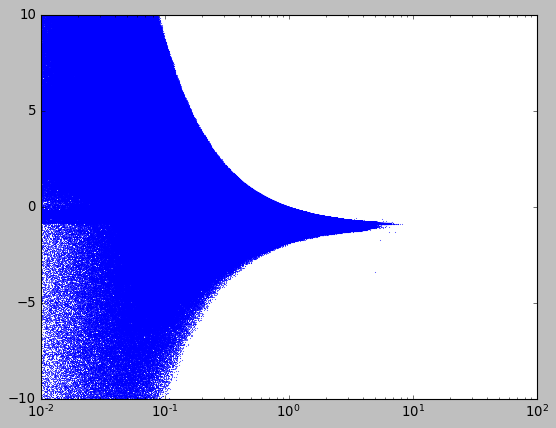

In [6]:
halo6_diff = (df_6_new['Epsilon'] - df_6_old['Epsilon']) / df_6_old['Epsilon']
# halo24_diff = (df_24_new['Epsilon'] - df_24_old['Epsilon']) / df_24_old['Epsilon']

print(halo6_diff[0])
print(df_6_old['Epsilon'][0])
plt.semilogx(df_6_old['Epsilon'][0], halo6_diff[0],'.',ms=1,alpha=0.6)
plt.ylim(-10,10)
plt.xlim(10e-3, 100)

In [59]:
df_level3 = pd.read_hdf("halos/level3/halo_6_level3.hdf5", "table")
df_new = pd.read_hdf("halos/new/level3_halo6_new.hdf5", "table")


In [56]:
df_new

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[0.38514886487430244, 0.9999323369314964, 0.16...","[-363984.28, -363657.8, -363653.94, -363653.66..."


In [ ]:

fig, axs = plt.subplots(1,2, figsize=(10,15), sharex=True,sharey=True)
axs[0].plot(df_level3['Redshift'], df_level3['Med_Eps'])
axs[1].plot(df_new['Redshift'], df_new['Epsilon'][0])

In [45]:
m =halo6_diff[0] == -inf
m.any()

True

In [36]:
df_6_old['Epsilon'][0][62831]

0.0

In [42]:
np.where(m == True)[0][0]
np.delete(halo6_diff[0], np.where(m == True)[0][0])

array([ 2.21127795e+03, -1.32690807e+04,  1.06583454e+03, ...,
       -1.24298532e+00, -3.37754056e+00, -1.31566227e+00])

[ 1.74096055e-04 -7.53637513e-05  1.53327018e-04 ... -4.11547494e+00
  4.99966756e+00  6.45985813e+00]
[ 2.21127795e+03 -1.32690807e+04  1.06583454e+03 ... -1.24298532e+00
 -3.37754056e+00 -1.31566227e+00]


ValueError: autodetected range of [-inf, 7552978.013755871] is not finite

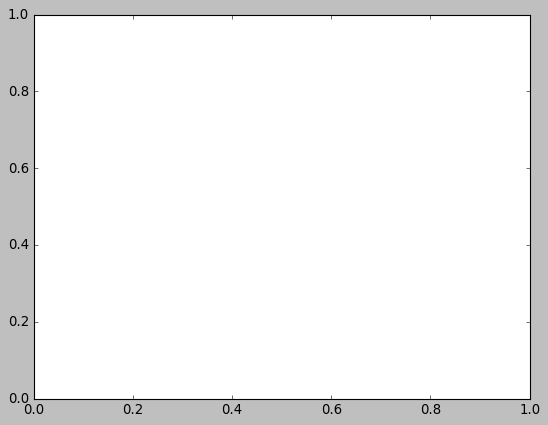

In [57]:
fig, ax = plt.subplots()
err = df_6_old['Epsilon'][0] == 0 
y = np.delete(halo6_diff[0], np.where(err == True)[0][0])
x = np.delete(df_6_old['Epsilon'][0], np.where(err == True)[0][0])
print(x)
print(y)
hist = ax.hist2d(x, y)

In [9]:
l = np.array([0, 3, 4, 2, 10, 7])
isort = np.argsort(l)
l[isort]

array([ 0,  2,  3,  4,  7, 10])

In [79]:
l = l[isort]

In [76]:
m = np.array([9, 8, 4, 1, 0, 7])
m[isort]

array([9, 1, 8, 4, 7, 0])

In [58]:
min(df_6_old['Spec Energy'][0])

-363984.28125

In [64]:
ii = np.argsort(df_6_old['Spec Energy'][0])
df_6_old['Spec Energy'][0][ii]

array([-363984.28125  , -363657.8125   , -363653.9375   , ...,
        -47556.3046875,  -46900.484375 ,  -46868.0234375])

In [60]:
np.sort(df_6_new['Epsilon'][0])

array([-90.08082932, -11.88691241,  -3.93164211, ...,   1.54802466,
         1.62151647,   2.00433012])

In [32]:
ii = np.argsort(df_6_old['Spec Energy'][0])
ii

array([14292376, 14304136, 14253746, ...,  8893631,   475807,  4001792])

In [52]:
df_6_new['Spec Energy'][0] 

array([-363984.28 , -363657.8  , -363653.94 , ...,  -47556.305,
        -46900.484,  -46868.023], dtype=float32)

In [50]:
df_6_new['Spec Energy'][0]

array([-363984.28 , -363657.8  , -363653.94 , ...,  -47556.305,
        -46900.484,  -46868.023], dtype=float32)

In [ ]:
# [array([-0.29844296,  0.82567055, -1.64026277, ...,  0.80861002,
#         2.13067741, -0.99162244]), array([-0.29844296,  0.82567055, -1.64026277, ...,  0.80861002,
#         2.13067741, -0.99162244])]

In [17]:
isort = np.argsort(df_6_new['Spec Energy'][0])
df_6_new['Epsilon'][0][isort]

array([ 0.99993234, -0.14696237,  0.38514886, ..., -2.1692726 ,
        1.3850646 ,  1.        ])

[-0.66552968 -1.15728332 -0.79059396 ... -4.03400313  2.74628583
 -0.76181519]
[2.98959962 0.93437989 1.8392443  ... 0.71498694 0.36971674 4.1984206 ]


(0.01, 100)

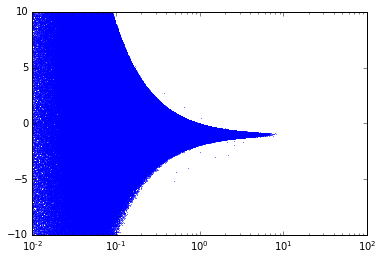

In [5]:

halo6_diff = (df_6_new['Epsilon'] - df_6_old['Epsilon']) / df_6_old['Epsilon']
halo24_diff = (df_24_new['Epsilon'] - df_24_old['Epsilon']) / df_24_old['Epsilon']

print(halo6_diff[0])
print(df_6_old['Epsilon'][0])
plt.semilogx(df_6_old['Epsilon'][0], halo6_diff[0],'.',ms=1,alpha=0.6)
plt.ylim(-10,10)
plt.xlim(10e-3, 100)


In [7]:
isort = np.argsort(df_6_new['Spec Energy'][0])

In [8]:
df_6_old['Epsilon'][isort]

In [5]:
df_6_new['Spec Energy'][0]

array([-3.6398427 , -3.636578  , -3.6365395 , ..., -0.47556305,
       -0.46900484, -0.46868023], dtype=float32)

In [6]:
isort

array([       0,        1,        2, ..., 14309085, 14309086, 14309087])

In [7]:
df_6_old

,Redshift,Epsilon,Spec Energy
0,2.220446e-16,"[2.989599616937918, 0.9343798888881452, 1.8392...","[-126985.7265625, -184960.890625, -97415.42187..."
1,2.220446e-16,"[2.989599616937918, 0.9343798888881452, 1.8392...","[-126985.7265625, -184960.890625, -97415.42187..."


ValueError: x and y must have same first dimension, but have shapes (14309088,) and (12,)

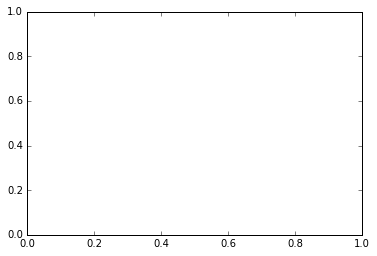

In [15]:
plt.plot(halo6_diff[0], df_6_new['Spec Energy'][0], '.',ms=1,alpha=0.6)

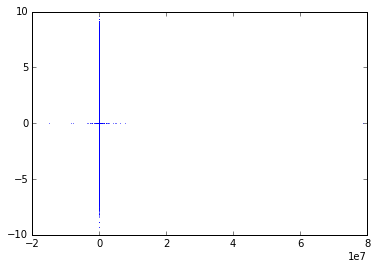

In [14]:
plt.plot(halo24_diff[0], df_24_old['Epsilon'][0],'.',ms=1,alpha=0.6)


In [ ]:
df_6_new_z2 = pd.read_hdf("halos/new/level3_halo6_new_z2.hdf5", "table")
df_6_old_z2 = pd.read_hdf("halos/new/level3_halo6_old_z2.hdf5", "table")
df_24_new_z2 = pd.read_hdf("halos/new/level3_halo24_new_z2.hdf5", "table")
df_24_old_z2 = pd.read_hdf("halos/new/level3_halo24_old_z2.hdf5", "table")